# Python Finance

**Análise Fundamentalista** - Tenta medir o valor intrínsico de uma companhia através de aspectos macroeconômicos e microeconômicos. Procura situações em que o preço de uma ação vale menos do que deveria.

**Análise Técnica** - Não se importa com o valor da companhia. Apenas busca tendências no preço das ações. Leva em consideração apenas o volume e o preço.

**Adj Close** - É o valor de fechamento de uma ação considerando dividendos e splits.

**Ibovespa** - É o mais importante indicador do desempenho médio das cotações das ações negociadas na Bolsa de Valores de São Paulo. É formado pelas ações com maior volume negociado nos últimos meses. O objetivo do Ibovespa é ser o indicador do desempenho médio das cotações dos ativos de maior negociabilidade e representatividade do mercado de ações brasileiro. (http://www.bmfbovespa.com.br/pt_br/produtos/indices/indices-amplos/indice-bovespa-ibovespa.htm)

**Backtesting** - É o processo de testar uma estratégia comercial em dados históricos relevantes para garantir sua viabilidade antes que o investidor arrisque qualquer capital real.



# Dados (yahoo finance)

In [1]:
# import pandas 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Carregar dados
stock = pd.read_csv('../data/CIEL3.csv')

# printar as 5 primeiras linhas
stock.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2017-05-02,24.24,24.49,24.06,24.30,6708000,24.30
1,2017-05-01,24.10,24.10,24.10,24.10,0,24.10
2,2017-04-28,24.15,24.38,23.89,24.10,6196600,24.10
3,2017-04-27,24.50,24.50,24.10,24.25,3276200,24.25
4,2017-04-26,24.68,24.68,23.96,24.36,5519900,24.36


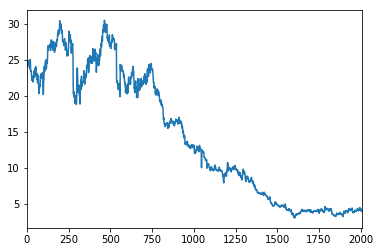

In [3]:
stock['Adj Close'].plot()

In [4]:
stock = pd.read_csv('../data/CIEL3.csv', index_col='Date', parse_dates=True)

stock.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-05-02,24.24,24.49,24.06,24.30,6708000,24.30
2017-05-01,24.10,24.10,24.10,24.10,0,24.10
2017-04-28,24.15,24.38,23.89,24.10,6196600,24.10
2017-04-27,24.50,24.50,24.10,24.25,3276200,24.25
2017-04-26,24.68,24.68,23.96,24.36,5519900,24.36


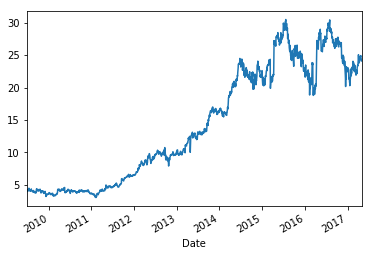

In [5]:
stock['Adj Close'].plot()

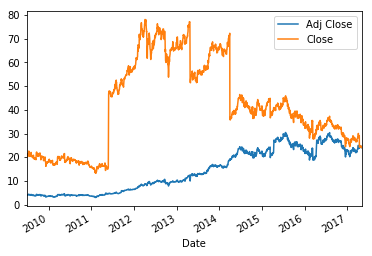

In [6]:
stock[['Adj Close', 'Close']].plot()

In [7]:
# importar classe date
from datetime import date

# importar módulo os. Permite manipular arquivos.
import os


def complete_missing_values(df):
    
    # Completa o dataframe da esquerda para da direita
    df.fillna(method='ffill', inplace=True)
    
    # Completa da direita pra esquerda
    df.fillna(method='bfill', inplace=True)
    return df


def get_stock(names=['^BVSP'], start_date=date(2016,1,1), end_date=date(2017,1,1)):
    
    # Cria um array de datas. Desde a data inicial até a final.
    dates = pd.date_range(start_date, end_date)
    
    # Cria um dataframe vazio, mas com os índices sendo dates.
    df = pd.DataFrame(index=dates, )
    
    # diretório onde estão os dados
    data_dir = '../data/'
    
    # Verifica se ibovespa está nas ações pedidas
    if '^BVSP' not in names:
        # Se não está, adiciona-se
        names.append('^BVSP')
    
    # Itera sobre as ações
    for name in names:
        # Define a localização de cada arquivo
        name_location = os.path.join(data_dir,name)
        # Carrega o arquivo em um dataframe temporário
        df_temp = pd.read_csv(name_location + '.csv', index_col='Date', parse_dates=True)
        # Une os dataframes tendo com base os índices do dataframe df
        df = df.join(df_temp['Adj Close'], how='left')
        # Renomeia a coluna Adj Close para o nome da ação
        df = df.rename(columns={'Adj Close': name})
        # Se ibovespa for uma das colunas, elimina os dias em que ibovespa não sofreu operação.
        if '^BVSP' in df.columns.values:
            df.dropna(subset=['^BVSP'], inplace=True)
         
    return complete_missing_values(df)

In [8]:
df = get_stock(['CIEL3'])

In [9]:
df.head()

,CIEL3,^BVSP
2016-01-04,21.61380,42141.0
2016-01-05,22.64714,42419.0
2016-01-06,22.99606,41773.0
2016-01-07,23.08331,40695.0
2016-01-08,23.48596,40612.0


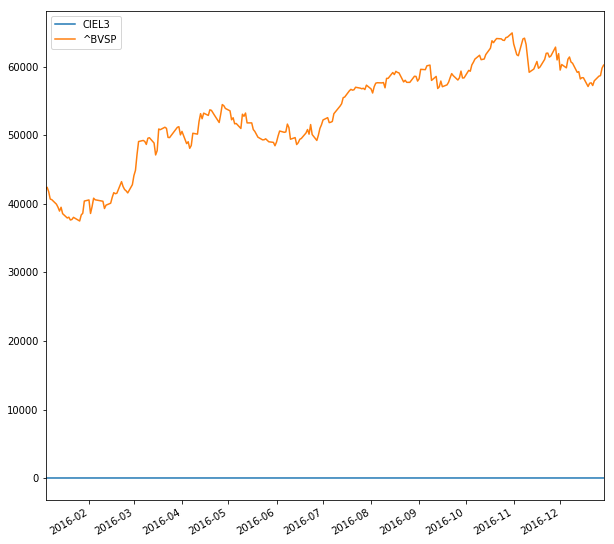

In [10]:
df.plot(figsize=(10,10))

In [11]:
def normalize(df):
    df = df/df.ix[0]
    return df

In [12]:
df['normalized'] = normalize(df[['CIEL3']])

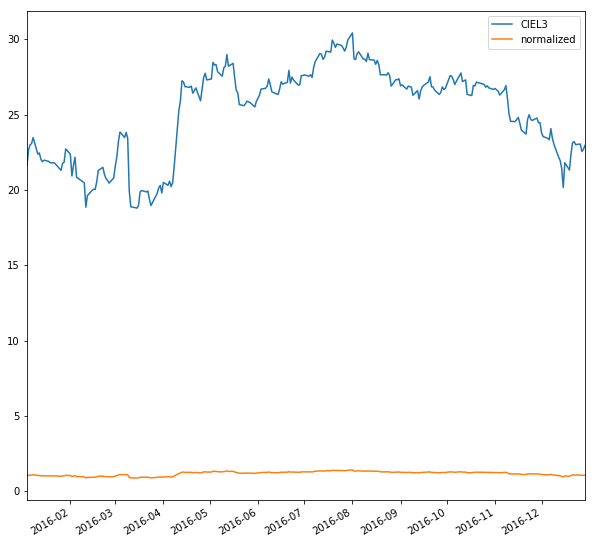

In [13]:
df[['CIEL3','normalized']].plot(figsize=(10,10))

# Retorno Diário

In [32]:
def compute_daily_returns(df):
    df_data = df.copy()
    df_data[1:] = (df[1:]/df[:-1].values) - 1
    df_data[0] = 0
    return df_data

In [33]:
dr_ciel = compute_daily_returns(df['normalized'])

In [29]:
dr_ciel.head()

2016-01-04    0.000000
2016-01-05    0.047809
2016-01-06    0.015407
2016-01-07    0.003794
2016-01-08    0.017443
Name: normalized, dtype: float64

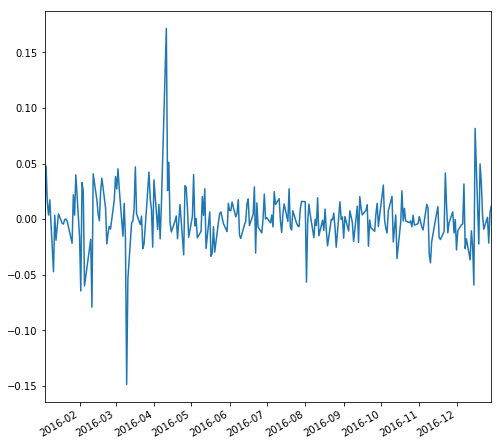

In [35]:
dr_ciel.plot(figsize=(8,8))

In [48]:
def plot_histogram(daily_returns):
    mean = daily_returns.mean()
    std = daily_returns.std()
    kurtosis = daily_returns.kurtosis()
    print("Média: {}".format(mean))
    print("Desvio-padrão: {}".format(std))
    print("Kurtosis: {}".format(kurtosis))
    daily_returns.hist(bins=40, figsize=(8,8))
    plt.axvline(mean, color='y', linestyle='dashed', linewidth=2)
    plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)

Média: 0.0005694958742896047
Desvio-padrão: 0.025627159542511272
Kurtosis: 12.171081987026923


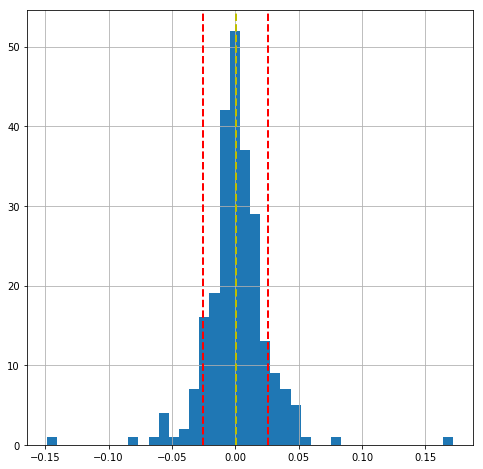

In [49]:
plot_histogram(dr_ciel)

# Média Móvel (Simple Moving Average)

In [156]:
def sma(df, window=20):
    sma = df.rolling(window).mean()
    return complete_missing_values(sma)

In [158]:
ciel = df[['normalized', 'CIEL3']]

In [159]:
ciel['sma'] = sma(ciel[['normalized']], 20)

In [160]:
ciel.head()

,normalized,CIEL3,sma
2016-01-04,1.000000,21.61380,1.026418
2016-01-05,1.047809,22.64714,1.026418
2016-01-06,1.063953,22.99606,1.026418
2016-01-07,1.067989,23.08331,1.026418
2016-01-08,1.086619,23.48596,1.026418


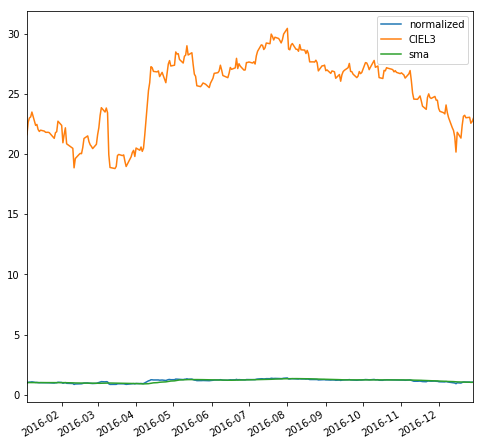

In [161]:
ciel.plot(figsize=(8,8))

# Bollinger Bands

In [162]:
def bollinger_band(df, window=20):
    sma = df.rolling(window).mean()
    sma = complete_missing_values(sma)
    up_bb = sma + 2 * complete_missing_values(df.rolling(window).std())
    do_bb = sma - 2 * complete_missing_values(df.rolling(window).std())
    return up_bb, do_bb

In [163]:
ciel['bb up'], ciel['bb down'] = bollinger_band(ciel[['normalized']], 20)

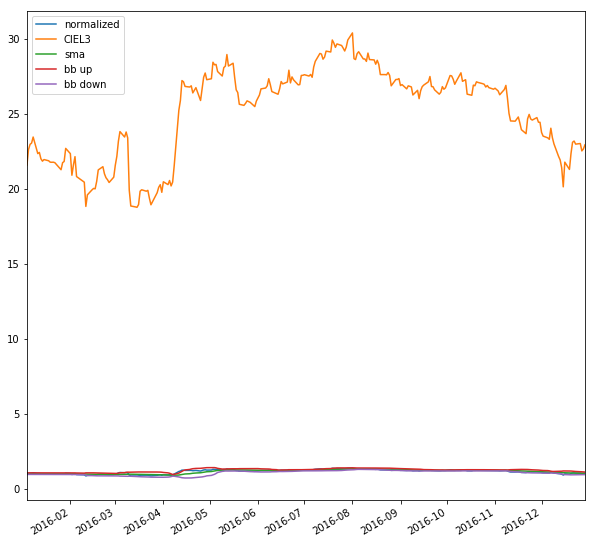

In [164]:
ciel.plot(figsize=(10,10))

# Volatilidade

In [165]:
def volatilidade(df, window=20):
    # A volatilidade pode ser considerada como o desvio-padrão
    vol = df.rolling(window).std()
    return complete_missing_values(vol)

In [166]:
ciel['volatilidade'] = volatilidade(ciel[['normalized']], 20)

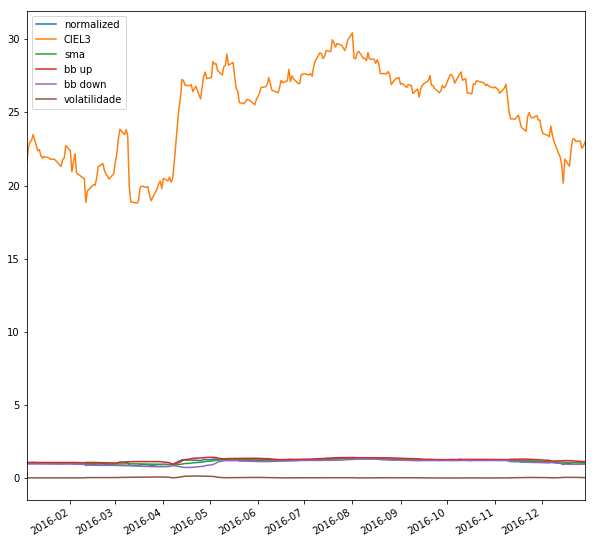

In [167]:
ciel.plot(figsize=(10,10))